# Gráficas y análisis de resultados

In [1]:
from matplotlib import pyplot as plt
import statistics
import scipy.stats

### Función cargarResultadosDeFichero

Dado un nombre de fichero, lo lee de manera que extrae la lista de tiempos de cada una de las 20 ejecuciones, así como la lista con las soluciones encontradas.

In [2]:
def cargarResultadosDeFichero(nomFichero):
    tiempos = []
    ejecuciones = []
    with open(nomFichero, "r") as txt_file:
        for i in range(20):
            tiempo = txt_file.readline()
            tiempo = tiempo[:-1]
            tiempos.append(float(tiempo))
            lectura = txt_file.readline()
            lectura = lectura[:-1]
            ejecucion = []
            while lectura != "FIN":
                tupla = [0,0]
                tupla[0] = int(lectura)
                lectura = txt_file.readline()
                lectura = lectura[:-1]
                lectura = lectura[:-1]
                lectura = lectura[1:]
                lectura = lectura.replace(" ", "")
                lectura = lectura.split(',')
                lectura = [int(lectura[i]) for i in range(len(lectura))]
                tupla[1] = lectura
                ejecucion.append(tupla)
                lectura = txt_file.readline()
                lectura = lectura[:-1]
            ejecuciones.append(ejecucion)
    return tiempos, ejecuciones

### Función pruebaVariosIndividuos

Función que carga los sucesivos archivos incrementando el número de individuos para finalmente devolver las medias de tiempo, iteraciones y calidad de las soluciones.

In [4]:
def pruebaVariosIndividuos(nombreProblema, nombreAlgoritmo, numCiudades):
    mediasTiempo = []
    mediasIteraciones = []
    mediasSolucion = []
    for numIndividuos in range(numCiudades, 5*numCiudades, 5):
        nombreArchivo = nombreProblema + "_" + nombreAlgoritmo + "_" + str(numIndividuos) + ".txt"
        tiempos,ejecuciones = cargarResultadosDeFichero(nombreArchivo)
        mediasTiempo.append(statistics.mean(tiempos))
        mediasIteraciones.append(statistics.mean([len(ejecuciones[i]) for i in range(len(ejecuciones))]))
        mediasSolucion.append(statistics.mean([ejecuciones[i][-1][0] for i in range(len(ejecuciones))]))
    return mediasTiempo, mediasIteraciones, mediasSolucion

#### Generación de gráficas con pruebas de varios individuos

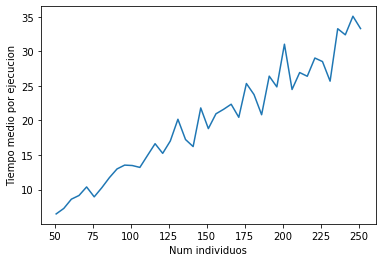

In [4]:
nombreProblema = "eil51"
numCiudades = 51
nombreAlgoritmo = "RFD"
mediasTiempo, mediasIteraciones, mediasSolucion = pruebaVariosIndividuos(nombreProblema, nombreAlgoritmo, numCiudades)
ejeX = [i for i in range(numCiudades, 5*numCiudades, 5)]
plt.xlabel("Num individuos")
plt.ylabel("Tiempo medio por ejecucion")
plt.plot(ejeX, mediasTiempo)

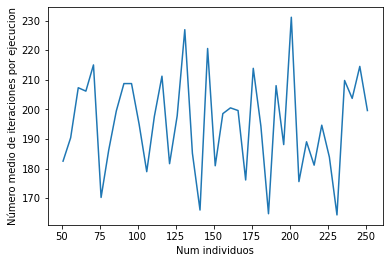

In [5]:
plt.xlabel("Num individuos")
plt.ylabel("Número medio de iteraciones por ejecucion")
plt.plot(ejeX, mediasIteraciones)

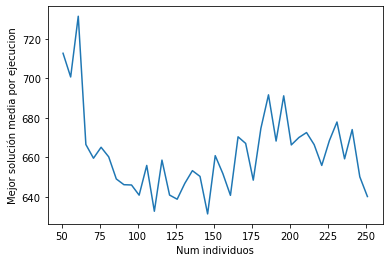

In [6]:
plt.xlabel("Num individuos")
plt.ylabel("Mejor solución media por ejecucion")
plt.plot(ejeX, mediasSolucion)

### Función pruebaMasIteraciones

Función que carga el archivo de la prueba incrementando el número de iteraciones para finalmente imprimir por pantalla las medias de tiempo, iteraciones y calidad de las soluciones.

In [8]:
def pruebaMasIteraciones(nombreProblema, nombreAlgoritmo, numIndividuos):
    mediasTiempo = []
    mediasIteraciones = []
    mediasSolucion = []
    nombreArchivo = nombreProblema + "_" + nombreAlgoritmo + "_Iteraciones_" + str(numIndividuos) + ".txt"
    tiempos,ejecuciones = cargarResultadosDeFichero(nombreArchivo)
    print(statistics.mean(tiempos))
    print(statistics.mean([len(ejecuciones[i]) for i in range(len(ejecuciones))]))
    print(statistics.mean([ejecuciones[i][-1][0] for i in range(len(ejecuciones))]))

In [13]:
nombreProblema = "eil51"
numIndividuos = 102
nombreAlgoritmo = "RFD"
pruebaMasIteraciones(nombreProblema, nombreAlgoritmo, numIndividuos)

876.3991701364517
14284.2
593


### Función pruebaFriedman

Función que carga el archivo de resultados de un cierto problema para todos los algoritmos y calcula y muestra el resultado del test de Friedman en cuanto al tiempo, iteraciones, y soluciones.

In [13]:
def pruebaFriedman(nombreProblema, numCiudades):
    algoritmos = ["AntSystem", "AntColonySystem", "MaxMinAntSystem", "IWD", 'BeeSystem', "RFD"]
    tiemposPorAlgoritmo = []
    iteracionesPorAlgoritmo = []
    solucionesPorAlgoritmo = []
    for nombreAlgoritmo in algoritmos:
        nombreArchivo = nombreProblema + "_" + nombreAlgoritmo + "_Problemas_" + str(numCiudades) + ".txt"
        tiempos,ejecuciones = cargarResultadosDeFichero(nombreArchivo)
        iteraciones = [len(ejecuciones[i]) for i in range(len(ejecuciones))]
        soluciones = [ejecuciones[i][-1][0] for i in range(len(ejecuciones))]
        tiemposPorAlgoritmo.append(tiempos)
        iteracionesPorAlgoritmo.append(iteraciones)
        solucionesPorAlgoritmo.append(soluciones)
    print(scipy.stats.friedmanchisquare(*tiemposPorAlgoritmo))
    print(scipy.stats.friedmanchisquare(*iteracionesPorAlgoritmo))
    print(scipy.stats.friedmanchisquare(*solucionesPorAlgoritmo))

In [18]:
pruebaFriedman("eil76", 76)

FriedmanchisquareResult(statistic=10.720000000000027, pvalue=0.029897762844229306)
FriedmanchisquareResult(statistic=69.88471177944865, pvalue=2.400679547413619e-14)
FriedmanchisquareResult(statistic=78.44, pvalue=3.727455660132193e-16)


### Función pruebaMasProblemas

Función que carga el archivo de resultados de un cierto problema con un cierto algoritmo y un cierto número de individuos y muestra la media de los tiempos, iteraciones, y soluciones, así como la mejor solución encontrada.

In [4]:
def pruebaMasProblemas(nombreProblema, nombreAlgoritmo, numIndividuos):
    mediasTiempo = []
    mediasIteraciones = []
    mediasSolucion = []
    nombreArchivo = nombreProblema + "_" + nombreAlgoritmo + "_Problemas_" + str(numIndividuos) + ".txt"
    tiempos,ejecuciones = cargarResultadosDeFichero(nombreArchivo)
    print(statistics.mean(tiempos))
    print(statistics.mean([len(ejecuciones[i]) for i in range(len(ejecuciones))]))
    print(statistics.mean([ejecuciones[i][-1][0] for i in range(len(ejecuciones))]))
    print(min([ejecuciones[i][-1][0] for i in range(len(ejecuciones))]))

In [25]:
pruebaMasProblemas("berlin52", 'MaxMinAntSystem', 52)

300.025896525383
5733.65
8345.1
8176
